# UNIT 2. Statistical Learning

This Unit includes main introduction to statistical learning, strongly based in {cite:p}`kroese2020`.

## Evaluation of the loss function in K-means

K-means is an example of unsupervised learning method. We will use this method along with `scipy` in order to evaluate the loss function calculated for a given dataset.

We will first import some data using `numpy`. 

In [1]:
import numpy as np
Xmat = np.genfromtxt('datasets/clusterdata.csv', delimiter=',')
n, D = Xmat.shape
n,D

(300, 2)

The first thing to do is always a visualization of the data

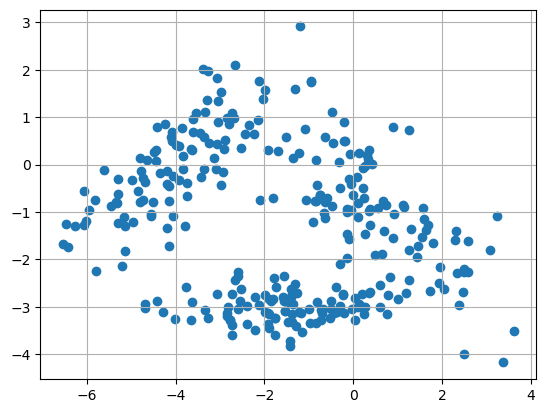

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Xmat[:,0],Xmat[:,1])
ax.grid(True)

plt.show()


First, we will run a K-means using `scikit-learn`, a high level wrapper for machine learning with `python`

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0,n_init="auto").fit(Xmat)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2], d

In [4]:
centers=kmeans.cluster_centers_
centers

array([[ 0.6177812 , -1.29975072],
       [-3.86806187,  0.04564101],
       [-1.84791126, -3.02916471]])

Now we plot again the clusters with colors for each label

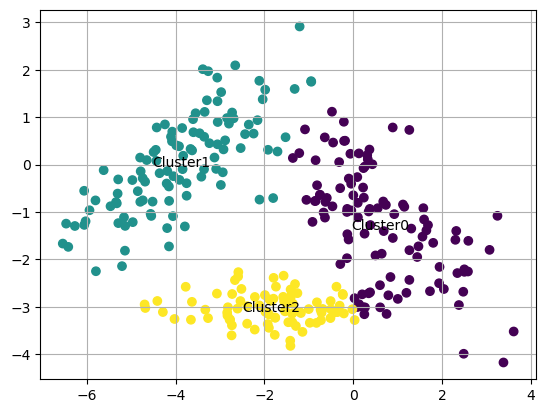

In [5]:
labels=kmeans.labels_
cluster_name = ["Cluster"+str(i) for i in set(labels)]

fig, ax = plt.subplots()
ax.scatter(Xmat[:,0],Xmat[:,1],c=labels)
for i, txt in enumerate(cluster_name):
    ax.text(centers[i,0],centers[i,1],s=txt,ha="center",va="center")
ax.grid(True)

plt.show()

with `seaborn` we can also find a nice plot in a faster way

<Axes: >

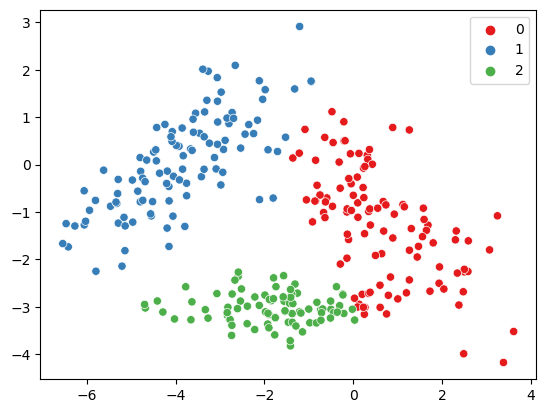

In [6]:
import seaborn as sns
sns.scatterplot(x=Xmat[:,0],y=Xmat[:,1],hue=labels,legend='full',palette="Set1")

We will now run it in a more manual and detailed way, without the use of `scikit-learn` We start by initializing the centers.

In [7]:
K = 3
c  = np.array([[-2.0,-4,0],[-3,1,-1]])  #initialize centers
cold = np.zeros(c.shape)
dist2 = np.zeros((K,n))
#for h in range(0,100):
while np.abs(c - cold).sum() > 0.001:
     print(c)
     cold = c.copy()
     for i in range(0,K): #compute the squared distances
          dist2[i,:] = np.sum((Xmat - c[:,i].T)**2, 1)
        
     label = np.argmin(dist2,0) #assign the points to nearest centroid
     minvals = np.amin(dist2,0)
     for i in range(0,K): # recompute the centroids
          c[:,i] = np.mean(Xmat[np.where(label == i),:], 1).reshape(1,2)

print('Loss = {:3.3f}'.format(minvals.mean()))

[[-2. -4.  0.]
 [-3.  1. -1.]]
[[-1.97122735 -3.99500505  0.48593068]
 [-3.01536786  0.0589819  -1.24373331]]
[[-1.92700937 -3.94414519  0.56115053]
 [-3.01308366  0.02001296 -1.29804366]]
[[-1.9285638  -3.92373524  0.56115053]
 [-3.04155556  0.01309036 -1.29804366]]
Loss = 2.288


## Polynomial  regression

Let us generate data drawn from iid random points that have a normal distribution with expectation $10 − 140ui + 400u^2i − 250u^3$ and variance  25. This is an example of a polynomial regression model. Using a squared-error loss, the optimal prediction function $h^*(u) = E[Y | U = u]$ is thus
$$h^*(u) = 10 − 140^u + 400u^2 − 250u^3$$

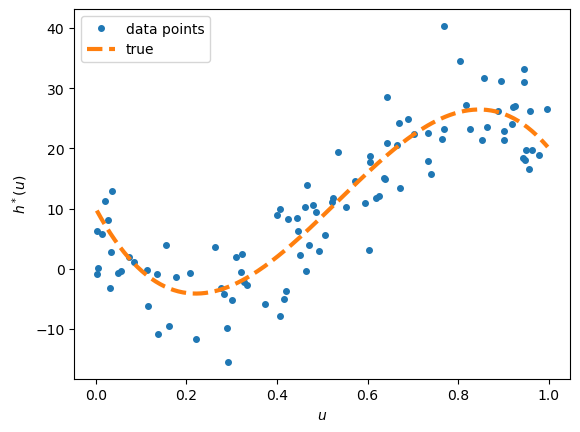

In [8]:
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
def generate_data(beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1)
   return u, y
np.random.seed(12)
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta , sig, n)
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plt.plot(u, y, '.', markersize=8)
plt.plot(xx, yy, '--',linewidth=3)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['data points','true'])
plt.savefig('../figures/polydatpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Training data with fitted curves fordifferent $p$

We will check the models for $p = 2, 4, 16$. The true cubic polynomial curve for p = 4 is also plotted (dashed line).

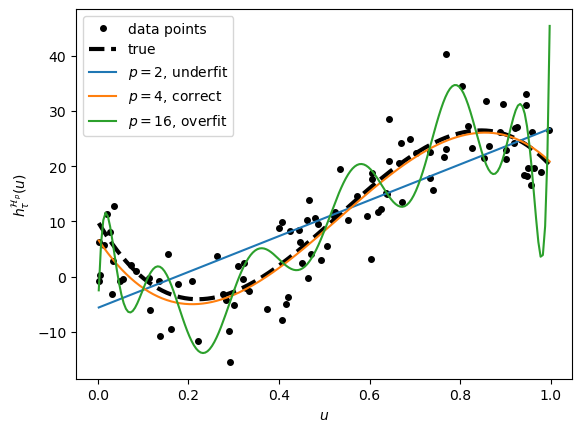

In [9]:
max_p = 18
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
betahat, trainloss = {}, {}

for p in p_range:  # p is the number of parameters
    if p > 1:
        X = np.hstack((X, u**(p-1)))  # add column to matrix

    betahat[p] = solve(X.T @ X, X.T @ y)
    trainloss[p] = (norm(y - X @ betahat[p])**2/n)

p = [2, 4, 16]  # select three curves

#replot the points and true line and store in the list "plots"
plots = [plt.plot(u, y, 'k.', markersize=8)[0], 
         plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^{\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots,('data points', 'true','$p=2$, underfit',
                  '$p=4$, correct','$p=16$, overfit','d'))
plt.savefig('../figures/polyfitpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Test loss as function of the number of parameters $p$ of the model.

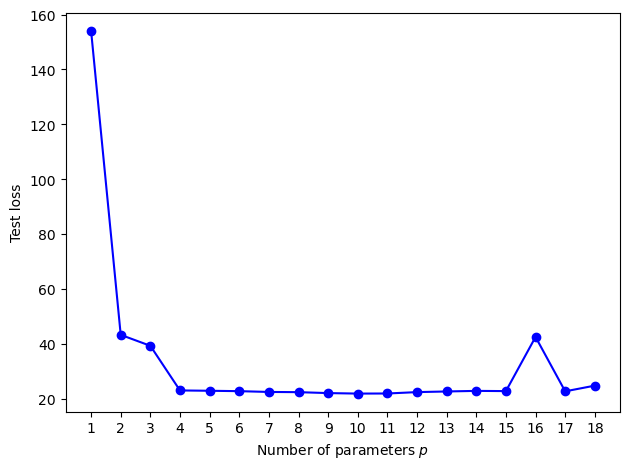

In [10]:
# generate test data
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))

    y_hat = X_test @ betahat[p]  # predictions
    MSE.append(np.sum((y_test - y_hat)**2/n))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(p_range, MSE, 'b', p_range, MSE, 'bo')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('../figures/MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### Cross-validation

For the polynomial regression example, we can calculate a $K$-fold cross-validation loss with a nonrandom partitioning of the training set using the following code.

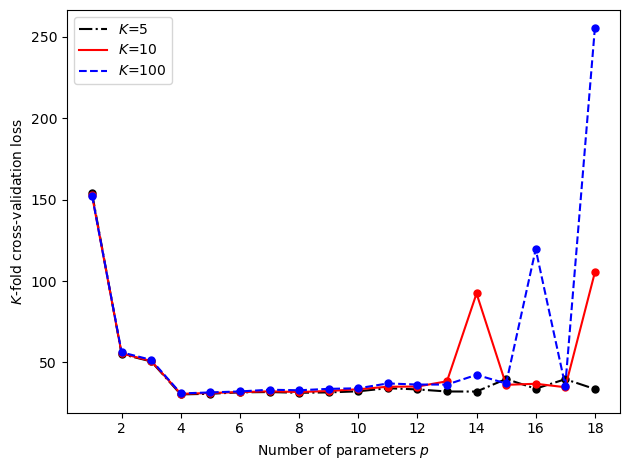

In [11]:
K_vals = [5, 10, 100]  # number of folds
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            # integer indices of test samples
            test_ind = ((n/K)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)

            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]

            # fit model and evaluate test loss
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)
            loss.append(norm(y_test - X_test @ betahat) ** 2)

        cv[j, p-1] = sum(loss) / n
        j += 1

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=10)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=10)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=10)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('Number of parameters $p$')
plt.ylabel('$K$-fold cross-validation loss')
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('../figures/crossvalpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


```{bibliography}
:style: unsrt
```